# Leveraging Similarity

## Measuring similarity between vectors

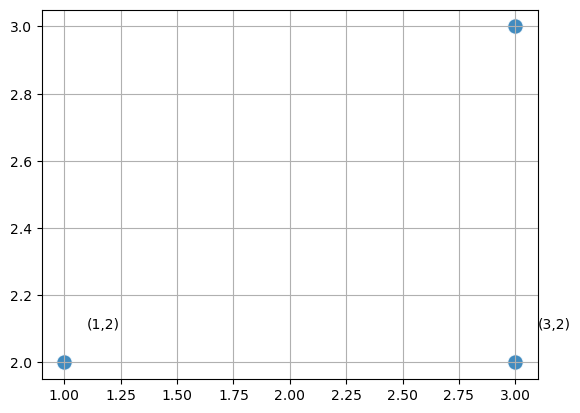

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

D = np.array([(1, 2), (3, 2), (3, 3)])

plt.scatter(D[:, 0], D[:, 1], s=2 ** 7, edgecolors='white',
            alpha=0.85, cmap='winter')

plt.annotate("(1,2)", (1 + 0.1, 2 + 0.1))
plt.annotate("(3,2)", (3 + 0.1, 2 + 0.1))
plt.annotate("(3,3)", (3 + 0.1, 3 + 0.1))

plt.grid()  # adds a grid
plt.show()  # Showing the result


![](14_Leveraging_similarity.png)

## Experimenting K-means reliability

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

features = data.data
labels = data.target

data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
from sklearn.cluster import MiniBatchKMeans, KMeans

k_means = KMeans(n_clusters=3, init='k-means++',
                 max_iter=999, n_init=1, random_state=101)

mb_k_means = MiniBatchKMeans(n_clusters=3, init='k-means++',
                             max_iter=999, batch_size=10, n_init=1, random_state=101)


In [4]:
k_means.fit(features)


KMeans(max_iter=999, n_clusters=3, n_init=1, random_state=101)

In [5]:
mb_k_means.fit(features)

MiniBatchKMeans(batch_size=10, max_iter=999, n_clusters=3, n_init=1,
                random_state=101)

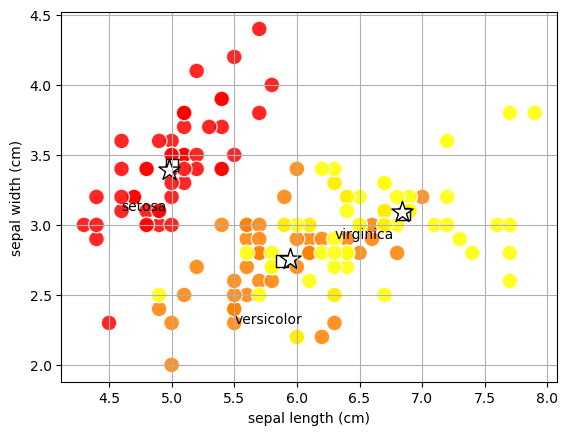

In [6]:
# NOTE: If you run this twice, the squares change position.
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(features[:, 0], features[:, 1], s=2 ** 7, c=labels,
            edgecolors='white', alpha=0.85, cmap='autumn')

plt.grid()  # adds a grid

plt.xlabel(data.feature_names[0])  # adds label to x axis
plt.ylabel(data.feature_names[1])  # adds label to y axis

# Printing centroids, first of regular K-means, then of mini-batch
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
            s=2 ** 6, marker='s', c='white', edgecolors='black')

plt.scatter(mb_k_means.cluster_centers_[:, 0],
            mb_k_means.cluster_centers_[:, 1], s=2 ** 8, marker='*', c='white', edgecolors='black')

for class_no in range(0, 3):  # We just annotate a point for each class
    plt.annotate(data.target_names[class_no],
                 (features[3 + 50 * class_no, 0], features[3 + 50 * class_no, 1]))

plt.show()  # Showing the result


## Experimenting how centroids converge

In [7]:
import numpy as np

np.set_printoptions(precision=3, suppress=True)  # sets output to 3 decimal points
print()

for iteration in range(1, 10):
    k_means = KMeans(n_clusters=3, init='random',
                     max_iter=iteration, n_init=1, random_state=101)
    k_means.fit(features)

    print("Iteration: %i - 2nd centroid: %s" %
          (iteration, k_means.cluster_centers_[1]))



Iteration: 1 - 2nd centroid: [5.362 3.763 1.513 0.275]
Iteration: 2 - 2nd centroid: [4.959 3.363 1.467 0.248]
Iteration: 3 - 2nd centroid: [4.914 3.28  1.536 0.277]
Iteration: 4 - 2nd centroid: [4.878 3.2   1.578 0.298]
Iteration: 5 - 2nd centroid: [4.833 3.167 1.581 0.297]
Iteration: 6 - 2nd centroid: [4.8   3.125 1.603 0.306]
Iteration: 7 - 2nd centroid: [4.779 3.086 1.624 0.317]
Iteration: 8 - 2nd centroid: [4.771 3.071 1.625 0.307]
Iteration: 9 - 2nd centroid: [4.769 3.038 1.654 0.315]


In [8]:
import numpy as np
from sklearn.datasets import make_circles, make_blobs

strange_data = make_circles(n_samples=500, shuffle=True,
                            noise=0.15, random_state=101, factor=0.5)

center = make_blobs(n_samples=100, n_features=2, centers=1,
                    cluster_std=0.1, center_box=(0, 0))

first_half = np.row_stack((strange_data[0][:250, :], center[0][:50, :]))
first_labels = np.append(strange_data[1][:250], np.array([0] * 50))

second_half = np.row_stack((strange_data[0][250:, :], center[0][50:, :]))
second_labels = np.append(strange_data[1][250:], np.array([0] * 50))


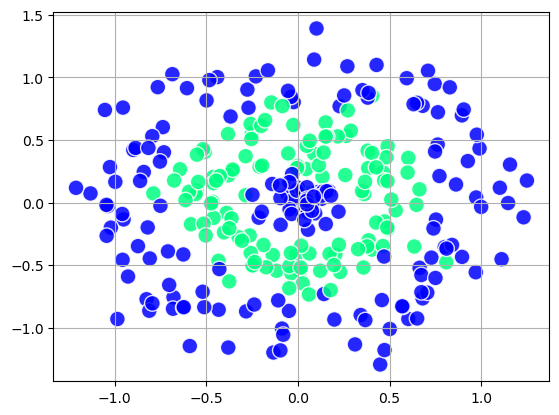

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(first_half[:, 0], first_half[:, 1], s=2 ** 7,
            c=first_labels, edgecolors='white',
            alpha=0.85, cmap='winter')

plt.grid()  # adds a grid
plt.show()  # Showing the result


In [10]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=3, weights='uniform',
                           algorithm='auto', metric='euclidean')

kNN.fit(first_half, first_labels)

print("\nLearning accuracy score: %0.3f" %
      accuracy_score(y_true=second_labels,
                     y_pred=kNN.predict(second_half)))



Learning accuracy score: 0.933
